# Week 11 Assignment - Custom Functions and Plotting

Write a function that will read in this week's county-level covid data ("covidData_4.7.20.csv") and create a line plot showing increases in cumulative case counts or deaths through time for  a particular state. The line plot should have labeled axes and a grid.

The function should accept two arguments. The first argument should be the name of the state. The second should indicate whether the user wants to plot case counts or deaths (defaulting to case counts). You will need to write a second function that calculates the case counts per state per day, summing across counties/parishes.

As always, remember to document your code, including docstrings for functions.

NOTE 1: One thing that tripped me up initially - not all counties/parishes have fips codes in this dataset. So that field may be empty for some lines in the file.

NOTE 2: Remember that when you first read from a file, everything is considered a string. To get proper plots, you'll need to convert numbers stored as strings to actual numbers.

In [15]:
# Import needed modules here
import matplotlib.pyplot as plt
import numpy as np
import copy
import re

In [16]:
def stateData(state,data = 'cases'):
    '''Function that will read covid-19 data and prepare varibles for a plot'''
    covidData = open("covidData_4.7.20.csv", "r")
    dataCases = {}
    dataDeaths = {}
    #for loop that will look at every case/death for every state
    for i in covidData:
        if state in i:
            date, county, state, fips, cases, deaths = i.split(",")
            if data == 'cases':
                case = int(cases)#creating the integer/summing cases
                if date in dataCases:
                    dataCases[date] += case
                else:
                    dataCases[date] = case
            elif data == 'deaths':
                death = int(deaths)#creating the integer/summing deaths
                if date in dataDeaths:
                    dataDeaths[date] += death
                else:
                    dataDeaths[date] = death
    covidData.close()
    xVar = []#create x varible
    yVar = []#create y varible
    #directing which data will go to the x or y varible
    xVar = list(dataCases.keys())
    if data == 'cases':
        yVar = list(dataCases.values())
    elif data == 'deaths':
        yVar = list(dataDeaths.values())
    return xVar,yVar #return the coordinate/plot

Enter a state: New York
Enter cases or deaths: cases


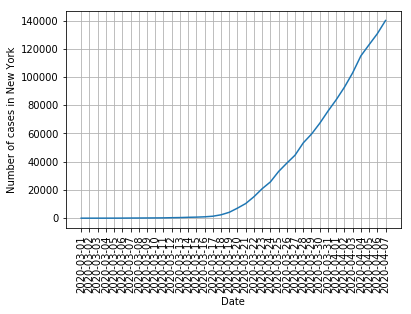

In [17]:
# Use your function to create a plot here
stateInput = input("Enter a state: ") #Enter any state
dataInput = input("Enter cases or deaths: ")# place to enter cases or deaths
xaxis, yaxis = stateData(state = stateInput, data = dataInput) #the data to input for each varible
#set up plot and axis names
plt.figure() 
plt.xlabel('Date') #creating x axis label
plt.ylabel('Number of {} in {}'.format(dataInput,stateInput)) #creating y axis label where it 
#describes which state and type of data
plt.xticks(rotation=90) #rotate x axis labels by 90 degrees
plt.grid(True) #adding a grid
plt.plot(xaxis, yaxis)
plt.show()

Write a second function that is similar to the first, but shows increases in cumulative case counts or deaths through time for a particular county/parish in a particular state.

The function should accept three arguments. The first argument should be the name of the county/parish. The second should be the name of the state. The third should indicate whether the user wants to plot case counts or deaths (defaulting to case counts).

As always, remember to document your code, including docstrings for functions.

In [18]:
# Your code here
def countyData(county, state, data = 'cases'):
    '''Function to read and prepare covid-19 data for a plot for each county in each state'''
    covidData = open("covidData_4.7.20.csv", "r")
    dataCases = {}
    dataDeaths = {}
    #look for every case/death for each county in each state
    for i in covidData:
        if county in i and state in i:
            date, county, state, fips, cases, deaths = i.split(",")
            if data == 'cases':
                case = int(cases)#create integer
                if date in dataCases: #summing the cases
                    dataCases[date] += case
                else:
                    dataCases[date] = case
            elif data == 'deaths':
                death = int(deaths)#create integer
                if date in dataDeaths:#summing the deaths
                    dataDeaths[date] += death
                else:
                    dataDeaths[date] = death
    covidData.close()
    xVar = []#create x varible list
    yVar = []#create y varible list
    #directing which data will go to the x or y varible
    xVar = list(dataCases.keys())
    if data == 'cases':
        yVar = list(dataCases.values())
    elif data == 'deaths':
        yVar = list(dataDeaths.values())
    return xVar,yVar #returning the coordinate/plot

Enter a county: Caddo
Enter a state: Louisiana
Enter cases or deaths: cases


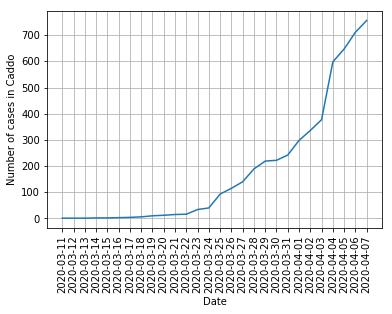

In [19]:
# Use your function to create a plot here
#creating place to input county/state/cases or deaths
countyInput = input("Enter a county: ")
stateInput = input("Enter a state: ")
dataInput = input("Enter cases or deaths: ")
xaxis, yaxis = countyData(county = countyInput, state = stateInput, data = dataInput) #directing which data goes to x and y axis
#setting up plot
plt.figure()
plt.xlabel('Date') #creat x axis lable
plt.ylabel('Number of {} in {}'.format(dataInput,countyInput)) #creating y axis label where it 
#describes which state and type of data
plt.xticks(rotation=90) #rotating x axis label by 90 degrees
plt.grid(True) #adding a grid
plt.plot(xaxis, yaxis)
plt.show()